# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


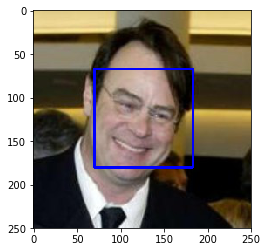

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
humans_ct = 0
mans_best_friend_ct = 0

for file in human_files_short:
    if face_detector(file) == True:
        humans_ct += 1
for file in dog_files_short:
    if face_detector(file) == True:
        mans_best_friend_ct += 1
        
print("%.1f%% Percent of first 100 images from human_files_short which detected a human face." % humans_ct)
print("%.1f%% Percent of first 100 images from dog_files_short which detected a human face." % mans_best_friend_ct)

98.0% Percent of first 100 images from human_files_short which detected a human face.
17.0% Percent of first 100 images from dog_files_short which detected a human face.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [01:23<00:00, 6617540.90it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = Image.open(img_path)
    img_transform = transforms.Compose([transforms.Resize(size = (224, 224)),      #size = (244, 244)),
                                        transforms.ToTensor(), 
                                        transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                             std = [0.229, 0.224, 0.225])])
    image = img_transform(image)
    image = image.unsqueeze(0)
    if use_cuda:
        image = image.cuda()
    output = VGG16(image)
    #have to copy to local
    pred = output.cpu()
    pred = pred.data.numpy().argmax() 
    return pred # predicted class index

In [8]:
VGG16_predict(dog_files_short[0])

243

In [9]:
human_files 

array(['/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg',
       '/data/lfw/Alex_Corretja/Alex_Corretja_0001.jpg',
       '/data/lfw/Daniele_Bergamin/Daniele_Bergamin_0001.jpg', ...,
       '/data/lfw/Ferenc_Madl/Ferenc_Madl_0002.jpg',
       '/data/lfw/Jim_Flaherty/Jim_Flaherty_0001.jpg',
       '/data/lfw/Stacey_Yamaguchi/Stacey_Yamaguchi_0001.jpg'], 
      dtype='<U90')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.    
    if 151 <= VGG16_predict(img_path) < 269:
        return True 
    else:
        return False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_file_dog_ct = 0
mans_best_friend_dog_ct = 0

for file in human_files_short:
    if dog_detector(file) == True:
        human_file_dog_ct += 1
for file in dog_files_short:
    if dog_detector(file) == True:
        mans_best_friend_dog_ct += 1
        
print("%.1f%% Percent of images from human_files_short which detected a dog." % human_file_dog_ct)
print("%.1f%% Percent of images from dog_files_short which detected a dog." % mans_best_friend_dog_ct)

0.0% Percent of images from human_files_short which detected a dog.
100.0% Percent of images from dog_files_short which detected a dog.


In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
from torchvision import datasets
from PIL import ImageFile
import torchvision.transforms as transforms
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
dog_dir = '/data/dog_images/'
dog_train_dir = os.path.join(dog_dir, 'train/')
dog_valid_dir = os.path.join(dog_dir, 'valid/')
dog_test_dir = os.path.join(dog_dir, 'test/')

dog_transform = {
    'train_transform' : transforms.Compose([transforms.Resize(256),
                                  transforms.RandomResizedCrop(224),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.RandomRotation(10),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                       std = [0.229, 0.224, 0.225])]),
    #changed 256 to 224
    'validation_transform' : transforms.Compose([transforms.Resize(224),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                       std = [0.229, 0.224, 0.225])]),
    'test_transform' : transforms.Compose([transforms.Resize(224),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                      std = [0.229, 0.224, 0.225])])
                }

dog_train = datasets.ImageFolder(dog_train_dir, transform = dog_transform['train_transform'])
dog_valid = datasets.ImageFolder(dog_valid_dir, 
                                 transform = dog_transform['validation_transform'])
dog_test = datasets.ImageFolder(dog_test_dir, transform = dog_transform['test_transform'])

batch_size = 50
num_workers = 0 

dog_train_loader = torch.utils.data.DataLoader(dog_train, batch_size = batch_size,
                                               num_workers = num_workers, shuffle = True)
dog_valid_loader = torch.utils.data.DataLoader(dog_valid, batch_size = batch_size,
                                               num_workers = num_workers, shuffle = True)
dog_test_loader = torch.utils.data.DataLoader(dog_test, batch_size = batch_size,
                                              num_workers = num_workers, shuffle = True)
data_loaders = dict(train_dog = dog_train_loader, 
                    validation_dog = dog_valid_loader,
                    test_dog = dog_test_loader)

In [14]:
print(dog_train_loader)
#print(dog_valid_loader.shape)
#print(dog_test_loader.shape)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

Part 1: 
- I used the RandomResize to take in the source, before using RandomResizedCrop to perform resizing on the images to 224 x 224 pixels. I chose to minimize the images over consideration of the processing time both on my limited CPU cabailities and limited access to GPU's. I then used RandomHorizontalFlip and RandomRotation to improve the models ability to generalize and avoid any potential overfitting issues.

Part 2: 
- I did decide to augment the tensor by normalizing the images with what I had learned from the VGG model. After re-examining the VGG architecture, I followed their data preparation framework to normalize the tensors with the specified mean and standard deviation values. I chose to use this because the model was trained on a significant number of images, and I decided that the model's normalization values could be transfered and applied in this use case.  

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        #1st convolutional layer
        #stride values tried: 2, 1, 
        self.conv1 = nn.Conv2d(3, 32, 3, stride = 2, padding = 1)
        #2nd convolutional layer
        self.conv2 = nn.Conv2d(32, 64, 3, stride = 2, padding = 1)
        #3rd convolutional layer
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1) #stride = 2
        #pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        #fully connected layers
        self.fc1 = nn.Linear(7*7*128, 512)
        #2nd connected layers with the number of dog classes 
        self.fc2 = nn.Linear(512, 133)
        #drop out
        self.dropout = nn.Dropout(0.4)
        #dropout values tried: 0.2, 0.4
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        #image flattening 
        x = x.view(-1, 7*7*128)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [16]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.4)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

First Layer:
 - The first layer takes an input with a 3 x 224 x 224 tensor, and after passing through the convolutional and pooling layer it generates a 56 x 56 x 3 tensor shape. 
 
Second Layer:
 - After passing through the convolutional and pooling layer it produces a 14 x 14 x 3 shape. 
 
Third Layer:
 - After passing through the convolutional and pooling layer it produces a shape of 7 x 7 x 3
 
After reviewing the material in the lessons I knew that the more layers there are, the more details that can be detected and accounted for regarding things such as the color scheme, figures (i.e. faces), or the shapes, among others. However, similar to my decision to crop the images due to processing ability I decided to cap the number of layers at at least 3. I did some additional reading on dropout and decided to pursue a higher value to avoid any potential overfitting issues. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
#learn rate values tried: 0.01, 0.02, 0.05, 0.1
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.1)

In [18]:
data_loaders['train_dog']

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train_dog']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            #initializing the weights at 0
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * data.size(0)
            
            #train_loss += train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            #print('Epoch %d, Batch %d loss: %.3f' % (epoch, batch_idx + 1, train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['validation_dog']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            
            #valid_loss += loss.item() * data.size(0)
            
            valid_loss += valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        train_loss = train_loss / len(dog_train_loader.sampler)
        valid_loss = valid_loss / len(dog_valid_loader.sampler)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(20, data_loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.884057 	Validation Loss: 163.658447
Epoch: 2 	Training Loss: 4.850165 	Validation Loss: 159.999390
Epoch: 3 	Training Loss: 4.801972 	Validation Loss: 157.103012
Epoch: 4 	Training Loss: 4.725828 	Validation Loss: 153.992874
Epoch: 5 	Training Loss: 4.668270 	Validation Loss: 153.239761
Epoch: 6 	Training Loss: 4.624016 	Validation Loss: 148.280853
Epoch: 7 	Training Loss: 4.605735 	Validation Loss: 150.005798
Epoch: 8 	Training Loss: 4.551181 	Validation Loss: 143.841690
Epoch: 9 	Training Loss: 4.522540 	Validation Loss: 147.289703
Epoch: 10 	Training Loss: 4.461035 	Validation Loss: 149.302948
Epoch: 11 	Training Loss: 4.427597 	Validation Loss: 150.012329
Epoch: 12 	Training Loss: 4.376091 	Validation Loss: 145.995132
Epoch: 13 	Training Loss: 4.327031 	Validation Loss: 137.113831
Epoch: 14 	Training Loss: 4.290578 	Validation Loss: 139.658035
Epoch: 15 	Training Loss: 4.247179 	Validation Loss: 137.106308
Epoch: 16 	Training Loss: 4.213529 	Validation Lo

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test_dog']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(data_loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.968487


Test Accuracy: 11% (92/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [21]:
## TODO: Specify data loaders
#opting to just use the loaders I previously created
data_loaders = dict(train_dog = dog_train_loader, 
                    validation_dog = dog_valid_loader,
                    test_dog = dog_test_loader)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [22]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained = True)

use_cuda = torch.cuda.is_available()

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(2048, 133)

for param in model_transfer.fc.parameters():
    param.requires_grad = True

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 102480336.81it/s]


In [23]:
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I decided to use the ResNet-50 setup because Udacity mentioned it as the best CNN architecture on the ImageNet dataset which includes animals; so I figured it would make it a good match to implement transfer learning given the use case. After loading the model I altered the final fully connected layer to output a classification into one of the 133 dog breeds in the dataset.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [24]:
#import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:
# train the model
#loaders_transfer == data_loaders
n_epochs = 20
model_transfer =  train(n_epochs, data_loaders, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.570521 	Validation Loss: 135.884094
Epoch: 2 	Training Loss: 3.886892 	Validation Loss: 108.803162
Epoch: 3 	Training Loss: 3.352989 	Validation Loss: 89.801079
Epoch: 4 	Training Loss: 2.905921 	Validation Loss: 77.218033
Epoch: 5 	Training Loss: 2.571496 	Validation Loss: 57.473358
Epoch: 6 	Training Loss: 2.326305 	Validation Loss: 55.402321
Epoch: 7 	Training Loss: 2.147477 	Validation Loss: 48.107243
Epoch: 8 	Training Loss: 1.979876 	Validation Loss: 43.018047
Epoch: 9 	Training Loss: 1.867132 	Validation Loss: 42.383858
Epoch: 10 	Training Loss: 1.749505 	Validation Loss: 39.619827
Epoch: 11 	Training Loss: 1.664280 	Validation Loss: 36.845654
Epoch: 12 	Training Loss: 1.588567 	Validation Loss: 30.027630
Epoch: 13 	Training Loss: 1.569571 	Validation Loss: 30.680498
Epoch: 14 	Training Loss: 1.510218 	Validation Loss: 27.818127
Epoch: 15 	Training Loss: 1.451167 	Validation Loss: 25.269135
Epoch: 16 	Training Loss: 1.423625 	Validation Loss: 24.894274

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [26]:
test(data_loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.725968


Test Accuracy: 84% (709/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [27]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_loaders['train_dog'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path)
    
    img_transform = transforms.Compose([transforms.Resize(size = (224, 224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                             std = [0.229, 0.224, 0.225])])
    
    image = img_transform(image)
    image = image.unsqueeze(0)
    if use_cuda:
        image = image.cuda()
        
    output = model_transfer(image)    
    output = output.cpu()
    return class_names[output.data.numpy().argmax()]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [28]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from PIL import Image
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path) is True:
        pred = predict_breed_transfer(img_path)
        print("This is your dog, I think you look like a {0}".format(pred))
    elif face_detector(img_path) > 0:
        pred = predict_breed_transfer(img_path)
        print("You're not man\'s best friend, nah you're a human. But if you were a dog you'd kind of look like a {0}".format(pred))
    else:
        print("These are not the droids we are looking for...")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

1. Add additional images to the dataset that include partially exposed faces to see if the model can still classify the dogs
2. Apply ensembling learning
3. Increase the number of dog images in the dataset to at least 10,000 images 
4. Take time to do hyperparameter tuning after initial training

In [36]:
import matplotlib.pyplot as plt                        
%matplotlib inline                               

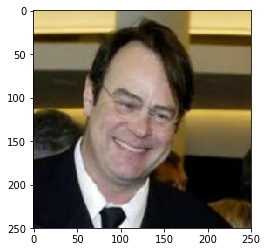

You're not man's best friend, nah you're a human. But if you were a dog you'd kind of look like a Dachshund


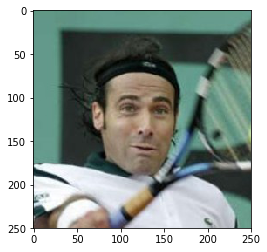

You're not man's best friend, nah you're a human. But if you were a dog you'd kind of look like a Dachshund


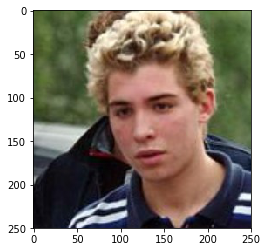

You're not man's best friend, nah you're a human. But if you were a dog you'd kind of look like a American water spaniel


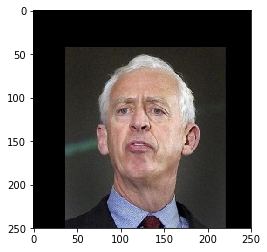

You're not man's best friend, nah you're a human. But if you were a dog you'd kind of look like a Basenji


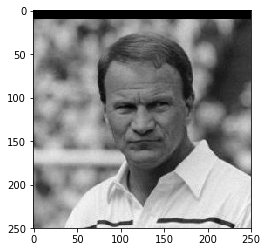

You're not man's best friend, nah you're a human. But if you were a dog you'd kind of look like a Dogue de bordeaux


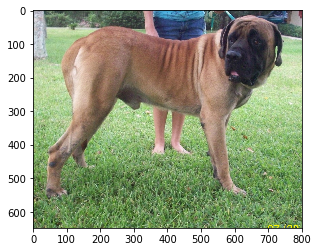

This is your dog, I think you look like a Bullmastiff


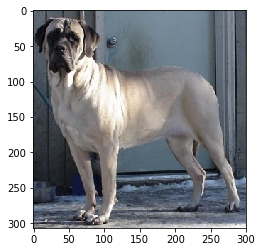

This is your dog, I think you look like a Bullmastiff


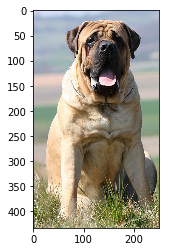

This is your dog, I think you look like a Bullmastiff


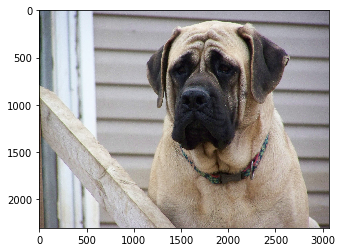

This is your dog, I think you look like a Mastiff


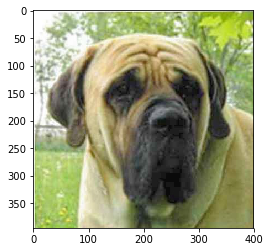

This is your dog, I think you look like a Bullmastiff


In [29]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:5], dog_files[:5])):
    run_app(file)

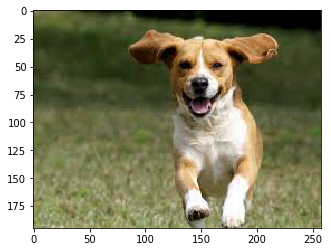

This is your dog, I think you look like a Beagle


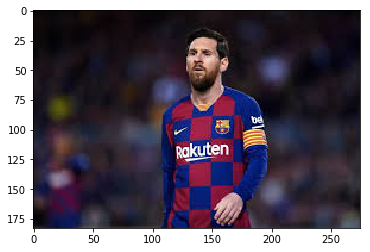

You're not man's best friend, nah you're a human. But if you were a dog you'd kind of look like a German shepherd dog


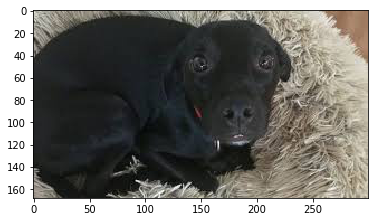

This is your dog, I think you look like a Neapolitan mastiff


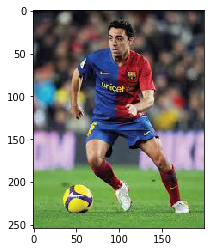

You're not man's best friend, nah you're a human. But if you were a dog you'd kind of look like a German shepherd dog


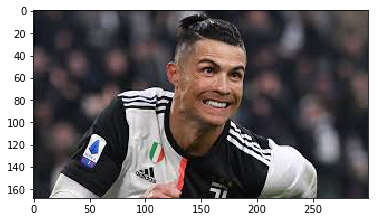

You're not man's best friend, nah you're a human. But if you were a dog you'd kind of look like a German shepherd dog


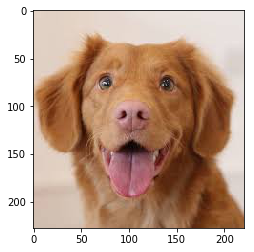

This is your dog, I think you look like a Nova scotia duck tolling retriever


In [30]:
folder = 'new_images'
new_img_dir = os.fsencode(folder)
#len([name for name in os.listdir(osdir)])

for file in os.listdir(new_img_dir):
    pics = folder + "/" + os.fsdecode(file)
    run_app(pics)
    